# Análisis Exploratorio y Estadístico de Datos con Python
## Introducción
Este Notebook tiene como objetivo realizar un análisis exploratorio de datos (EDA) en un conjunto de datos del sector retail, utilizando Python como herramienta principal. A lo largo del análisis, abordaremos diferentes técnicas de limpieza, transformación, visualización y análisis estadístico para extraer información valiosa y ayudar en la toma de decisiones basadas en datos.

### Objetivos del Notebook:
1. Limpieza y preparación de datos
2. Estadistica univariada
3. tablas de contingencia
4. Correlación
5. ANOVA

Este enfoque estructurado nos permitirá obtener una visión integral del conjunto de datos y extraer conclusiones que puedan ser aplicadas en el ámbito empresarial en General.

**Autor:**  ISAIAS DAVID PEREZ SARMIENTO - ANALISTA DE DATOS

# 1. Limpieza y preparación de datos
### Objetivos
1. Entender los diferentes tipos de datos que se presentanen los datos
2. Identificar datos duplicados y nulos
3. Realizar el análisis del tipo de dato en concordancia con la interpretación del lenguaje de programación

In [6]:
# Importación de librerías
import os
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chi2, stats
import plotly.express as px


In [7]:
# carga de datos en formato csv:
data= pd.read_csv('C:/Users/isape/OneDrive/Documentos/Ciencia de Datos/Ciencia de datos Aplicada/Caso Retail Ventas/Ordenes_productos_C1_M2.csv', sep=';',encoding='latin-1')

# Visualizamos los datos
data.head(7)

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,107500PO59A,A,PO59,VE5389,07/04/2018 18:12,271.86,30.72,52435,Mallama,Nariño,Productos ecoamigables,6,7,27,2486,17,11,14
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29
3,52187PA10A,A,PA10,VE3159,23/09/2017 23:27,108.38,35.39,52435,Mallama,Nariño,Electrodomésticos,10,1,6,734,46,48,22
4,84639PR12A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,73001,Ibague,Tolima,Frutas y verduras,23,16,35,884,45,26,18
5,73003PS37A,A,PS37,VE3806,09/12/2017 16:52,132.51,33.68,52356,Ipiales,Nariño,Carnicería,13,19,29,811,29,9,16
6,41673PB76A,A,PB76,VE2456,11/02/2018 20:04,420.95,12.19,52240,Chachagui,Nariño,Ropa de adultos,8,37,24,621,26,41,29


In [8]:
# Revisar la informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10134 entries, 0 to 10133
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   orden_id                       10134 non-null  object 
 1   order_item_id                  10134 non-null  object 
 2   producto_id                    10134 non-null  object 
 3   vendedor_id                    10134 non-null  object 
 4   fecha_envio_limite             10134 non-null  object 
 5   precio                         10134 non-null  float64
 6   valor_flete                    10134 non-null  float64
 7   codigo_postal_vendedor         10134 non-null  int64  
 8   ciudad_vendedor                10134 non-null  object 
 9   departamento_vendedor          10134 non-null  object 
 10  nombre_categoria_producto      10134 non-null  object 
 11  longitud_nombre_producto       10134 non-null  int64  
 12  longitud_descripcion_producto  10134 non-null 

Vemos que python presenta los datos, en este caso, como: object, float64 e int64 donde estos dos últimos se refieren a datos numéricos, y el otro tipo a datos categóricos.

Sin embargo cabe resaltar que **codigo_postal_vendedor** que es un identificador de la orden lo está tomando como un dato numérico

In [9]:
# Obtener estadísticas básica
data['codigo_postal_vendedor'].describe()

count    10134.000000
mean     49991.684626
std      22463.895340
min       5001.000000
25%      50001.000000
50%      52323.000000
75%      54003.000000
max      99001.000000
Name: codigo_postal_vendedor, dtype: float64

### ¡Cuidado con este error de interpretación!
Al ser un dato de identificación es un dato categórico y no tiene ninguna interpretación describir las estadísticas descriptivas básicas

In [10]:
# lo mejor es convertirlo en categórico
data['codigo_postal_vendedor']=data['codigo_postal_vendedor'].astype(str)
data.dtypes

orden_id                          object
order_item_id                     object
producto_id                       object
vendedor_id                       object
fecha_envio_limite                object
precio                           float64
valor_flete                      float64
codigo_postal_vendedor            object
ciudad_vendedor                   object
departamento_vendedor             object
nombre_categoria_producto         object
longitud_nombre_producto           int64
longitud_descripcion_producto      int64
cantidad_fotos_producto            int64
peso_g_producto                    int64
longitud_cm_producto               int64
altura_cm_producto                 int64
ancho_cm_producto                  int64
dtype: object

### Datos nulos

Los datos nulos son los registros que por cualquier razón no registran ningún dato, que por lo tanto van a generar un ruido o un sesgo (dependiendo del análisis) y que va a alterar el manejo de los datos para realizar análisis de alto nivel

**Contexto:** No existen datos faltantes en la base, ya que si no están los datos de las órdenes no es posible encontrar cómo realizar el envío

In [11]:
## Función para revisar nulos
# Muestra variable por variable qué porcentaje de nulos se tienen
data.isna().sum()/len(data)

orden_id                         0.0
order_item_id                    0.0
producto_id                      0.0
vendedor_id                      0.0
fecha_envio_limite               0.0
precio                           0.0
valor_flete                      0.0
codigo_postal_vendedor           0.0
ciudad_vendedor                  0.0
departamento_vendedor            0.0
nombre_categoria_producto        0.0
longitud_nombre_producto         0.0
longitud_descripcion_producto    0.0
cantidad_fotos_producto          0.0
peso_g_producto                  0.0
longitud_cm_producto             0.0
altura_cm_producto               0.0
ancho_cm_producto                0.0
dtype: float64

In [12]:
data.shape

(10134, 18)

Las variables involucradas apenas tienen data faltante menor al 1%, por lo tanto se debe decidir cuál criterio utilizar para la data faltante
1. Métodos de eliminacion
2. Análisis de regresión
3. Técnicas de imputación de datos
4. Mantener los vacíos

**Análisis:** En este caso al no contar con el nombre, categoría ni medidas del producto es necesario eliminar estos registros, así como la orden creada y hablar con los clientes para generar la devolución de su dinero

In [13]:
# eliminar los datos vacío
data = data.dropna()
data.shape

(10134, 18)

### Duplicados

Identificar los datos (registros) que por alguna razón tienen columnas repetidas en todas las variables, es decir está generando data erronea ya que está mostrando datos que ya están en la base

**Contexto:** Existen órdenes duplicadas para realizar los envíos

In [14]:
#Revisar cuáles registros están duplicados
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10129    False
10130    False
10131    False
10132    False
10133    False
Length: 10134, dtype: bool

In [15]:
# establecer un método para eliminar duplicados
data=data.drop_duplicates()
data.head(7)

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,107500PO59A,A,PO59,VE5389,07/04/2018 18:12,271.86,30.72,52435,Mallama,Nariño,Productos ecoamigables,6,7,27,2486,17,11,14
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29
3,52187PA10A,A,PA10,VE3159,23/09/2017 23:27,108.38,35.39,52435,Mallama,Nariño,Electrodomésticos,10,1,6,734,46,48,22
4,84639PR12A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,73001,Ibague,Tolima,Frutas y verduras,23,16,35,884,45,26,18
5,73003PS37A,A,PS37,VE3806,09/12/2017 16:52,132.51,33.68,52356,Ipiales,Nariño,Carnicería,13,19,29,811,29,9,16
6,41673PB76A,A,PB76,VE2456,11/02/2018 20:04,420.95,12.19,52240,Chachagui,Nariño,Ropa de adultos,8,37,24,621,26,41,29


In [16]:
#Mostrar la totalidad de datos duplicados, la función .sum() muestra la suma de registros
data.duplicated().sum()

0

**Análisis:** No existen órdenes duplicadas

# 2. Estadística univariada

### Objetivos
1. Entender y analizar los usos de las tablas de frecuencias para resolver problemas relevantes para el negocio
2. Entender y analizar las principales medidas de tendencia central y su interpretación
3. Entender y analizar las medidas de dispersión más comunes para el análisis de datos 
### Contexto del caso
Se analizará las medidas de **dispersión, posición y variabilidad** para el sector retail, para esto tomaremos los datos más relevantes de precios, medidas y envíos de los productos para poder validar las hipótesis propuestas 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10134 entries, 0 to 10133
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   orden_id                       10134 non-null  object 
 1   order_item_id                  10134 non-null  object 
 2   producto_id                    10134 non-null  object 
 3   vendedor_id                    10134 non-null  object 
 4   fecha_envio_limite             10134 non-null  object 
 5   precio                         10134 non-null  float64
 6   valor_flete                    10134 non-null  float64
 7   codigo_postal_vendedor         10134 non-null  object 
 8   ciudad_vendedor                10134 non-null  object 
 9   departamento_vendedor          10134 non-null  object 
 10  nombre_categoria_producto      10134 non-null  object 
 11  longitud_nombre_producto       10134 non-null  int64  
 12  longitud_descripcion_producto  10134 non-null 

### Tablas de frecuencias
La tabla de frecuencias es una herramienta que permite ordenar los datos, de manera que se presentan numéricamente las características de la distribución de un conjunto de datos o muestra. Para la solución del caso de uso es necesario identificar una posible hipótesis para validar a través de las herramientas que se revisarán en las siguientes líneas

**Hipótesis:** La categoría de celulares es la que más productos vende, se quiere validar ya que se desea lanzar una campaña de descuento para traer más clientes a la empresa, sin embargo se debe conocer cuál va a ser la categoría en la cual se invierta más publicidad

In [18]:
## Tabla de frecuencia univariada
#Se va a realizar una tabla para analizar las categorías que se venden en el comercio
# Frecuencia absoluta
frec_data=data['nombre_categoria_producto'].value_counts().reset_index()
frec_data.head(10)

,nombre_categoria_producto,count
0,Tecnología,543
1,Deportes,537
2,Frutas y verduras,532
3,Carnicería,523
4,Ropa de adultos,521
5,Ferretería,519
6,Juguetes,519
7,Ropa infantil,512
8,Electrodomésticos,510
9,Dormitorio,509


In [19]:
# Crear la tabla de frecuencias si no se ha hecho
frec_data = data['nombre_categoria_producto'].value_counts().reset_index()
frec_data.columns = ['nombre_categoria_producto', 'conteo']

# Calcular la frecuencia relativa
frec_data['porcentaje_nombre_categoria_producto'] = frec_data['conteo'] / frec_data['conteo'].sum()

# Visualizar los primeros 5 registros
frec_data.head(5)


,nombre_categoria_producto,conteo,porcentaje_nombre_categoria_producto
0,Tecnología,543,0.053582
1,Deportes,537,0.052990
2,Frutas y verduras,532,0.052497
3,Carnicería,523,0.051608
4,Ropa de adultos,521,0.051411


In [21]:
# frecuencia absoluta y relativa acumulada con cumsum()
# absoluta acumulada
frec_data['acumulada_nombre_categoria_producto']=frec_data['nombre_categoria_producto'].cumsum()
# relativa acumulada
frec_data['acumulada_porcentaje_nombre_categoria_producto']=frec_data['porcentaje_nombre_categoria_producto'].cumsum()
frec_data.head(5)

,nombre_categoria_producto,conteo,porcentaje_nombre_categoria_producto,acumulada_nombre_categoria_producto,acumulada_porcentaje_nombre_categoria_producto
0,Tecnología,543,0.053582,Tecnología,0.053582
1,Deportes,537,0.052990,TecnologíaDeportes,0.106572
2,Frutas y verduras,532,0.052497,TecnologíaDeportesFrutas y verduras,0.159068
3,Carnicería,523,0.051608,TecnologíaDeportesFrutas y verdurasCarnicería,0.210677
4,Ropa de adultos,521,0.051411,TecnologíaDeportesFrutas y verdurasCarniceríaR...,0.262088


In [22]:
frec_data

,nombre_categoria_producto,conteo,porcentaje_nombre_categoria_producto,acumulada_nombre_categoria_producto,acumulada_porcentaje_nombre_categoria_producto
0,Tecnología,543,0.053582,Tecnología,0.053582
1,Deportes,537,0.052990,TecnologíaDeportes,0.106572
2,Frutas y verduras,532,0.052497,TecnologíaDeportesFrutas y verduras,0.159068
3,Carnicería,523,0.051608,TecnologíaDeportesFrutas y verdurasCarnicería,0.210677
4,Ropa de adultos,521,0.051411,TecnologíaDeportesFrutas y verdurasCarniceríaR...,0.262088
5,Ferretería,519,0.051214,TecnologíaDeportesFrutas y verdurasCarniceríaR...,0.313302
6,Juguetes,519,0.051214,TecnologíaDeportesFrutas y verdurasCarniceríaR...,0.364515
7,Ropa infantil,512,0.050523,TecnologíaDeportesFrutas y verdurasCarniceríaR...,0.415038
8,Electrodomésticos,510,0.050326,TecnologíaDeportesFrutas y verdurasCarniceríaR...,0.465364
9,Dormitorio,509,0.050227,TecnologíaDeportesFrutas y verdurasCarniceríaR...,0.515591


**Análisis**: La tabla de frecuencias nos muestra la siguiente información

1. Frecuencia absoluta: número de veces que aparece un valor. 
 
2. Frecuencia relativa: el resultado de dividir la frecuencia absoluta de un determinado valor por el número total de datos. 

3. Frecuencia acumulada: la suma de las frecuencias absolutas de todos los valores iguales o menores al valor considerado. 

4. Frecuencia acumulada relativa: el resultado de dividir la frecuencia acumulada por el número total de información.

In [23]:
## Tabla de frecuencia bivariada
# Tabla que muestra la frecuencia por cuidad de venta y categoría del producto
pd.crosstab(index=data['nombre_categoria_producto'], columns=data['ciudad_vendedor'])

ciudad_vendedor,Abejorral,Abrego,Abriaqui,Acacias,Acandi,Acevedo,Achi,Agua de dios,Arauca,Arboleda,...,San andres,San jose del guaviare,San juan de arama,San juanito,Santa marta,Sincelejo,Tunja,Valledupar,Villavicencio,Yopal
nombre_categoria_producto,,,,,,,,,,,,,,,,,,,,,
Bebés,9,23,1,20,0,0,9,4,3,6,...,2,6,8,18,1,12,1,5,23,10
Carnicería,8,16,1,15,0,0,5,7,10,7,...,1,6,13,13,1,10,4,4,24,5
Celulares,7,19,0,17,0,1,11,9,4,9,...,3,3,11,12,0,8,2,5,17,16
Deportes,10,19,0,24,1,0,4,3,5,5,...,3,6,7,11,0,21,3,2,33,7
Dormitorio,8,9,2,19,0,0,9,3,11,9,...,2,6,9,10,1,17,2,2,31,7
Electrodomésticos,5,27,1,17,1,0,5,6,3,4,...,2,1,6,8,2,16,5,3,18,7
Ferretería,5,14,0,18,0,0,6,7,9,6,...,3,2,18,11,1,15,6,4,15,12
Frutas y verduras,6,20,0,16,2,0,6,5,8,12,...,2,7,15,16,2,14,2,1,24,15
Juguetes,9,18,0,19,2,0,11,3,6,11,...,6,1,15,11,3,17,4,3,30,12


**Análisis:** Es posible en la tabla ver la cantidad de compras que tiene las diferentes categorías, la que más tiene es *Tecnología* con 532 ventas en total

### Tendencia central
1. Media
2. Mediana
3. Moda

**Hipótesis**: Los precios en el comercio son mayores a 500, ya que el estudio de marketing arrojó que los clientes más recurrentes compran mayormente productos más económicos(debajo de 500), por lo tanto es necesario validar si en promedio la compañía tiene precios más competitivos

In [24]:
## Media o promedio
#Promedio de precios
data['precio'].mean()

119.7923465561476

In [25]:
## Mediana 
#Mediana de precios, valor central de la distribución de los datos
data['precio'].median()

83.12

In [26]:
## Moda
# Valor más común en los precios
data['precio'].mode()

0     3.92
1    11.39
2    11.79
3    15.80
4    16.42
5    25.45
6    34.43
7    36.96
8    56.79
Name: precio, dtype: float64

**Análisis:** Es posible analizar que el promedio es inferior a 500 ubicándose en 120, la mediana que es el dato central se ubica 83.12 y existen varios valores comunes y todos debajo de 60 lo que nos muestra que la mayor cantidad de precios son bajos y que permite ser más atractivos para el consumidor final que compra mayormente productos debajo de 500

### Medidas de localización
Los ___cuantiles y percentiles___ son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales o que dividen las observaciones en una muestra de la misma forma.

Así se pueden representar un porcentaje de datos a través de los cuantiles para identificar cómo están localizados los datos

**Hipótesis:** La mitad(50%) de los productos pesa más de 500 gramos, ya que la empresa de mensajería quiere realizar un descuento si los productos pesan menos de 500 gramos, así la compañía podría bajar los precios de envío de la mitad de los productos que se venden

In [27]:
## Cuantiles
# Calcular el 20%, 50% y 70% del peso de los productos
data['peso_g_producto'].quantile([0.20,0.50,0.70])

0.2     470.0
0.5    1458.5
0.7    2535.1
Name: peso_g_producto, dtype: float64

**Análisis:** El percentil 50 tiene un valor de 1458, lo cual nos indica que la mitad de los productos tienen un peso más alto que 500 gramos lo cual nos rechaza la hipótesis y nos indica que no se puede realizar el descuento sobre ese volumen de producto, sin embargo deja abierta la puerta encontrar qué cantidad de productos pueden contar con el descuento

###  Medidas de dispersión

Se utilizan las estadísticas de dispersión para dar un número único que describa qué tan compacto o disperso es un conjunto de observaciones. Estas se complementan de las medidas mencionadas anteriormente

Estas medidas entre más grandes, representan más dispersión y entre más pequeñas más concentradas están las observaciones (es importante tener en cuenta la escala de la variable para analizar el dimensión)

1. Desviación estándar
2. Rango Intercuartílico
3. Rango 
4. Coeficiente de variación

**Hipótesis**: La variación de las longitudes de los datos es mayor a 20cms, ya que las de empresas de mensajería que tienen cubículos de transporte de mensajería individual de producto de longitud 20 cm son más económicas, así se podría cambiar a estas empresas y ahorrar en costos de envío 


In [28]:
## Desviación estándar
# Encontrar la desviación estándar de la longitud de los productos de la muestra
# Representa qué tan lejos de la media se encuentran las observaciones
data['longitud_cm_producto'].std()

15.292866357696994

In [29]:
## Rango intercuartílico
# Encontrar el rango intercuartílico de la longitud de los productos
# es la diferencia entre el tercer y el primer cuartil.
data['longitud_cm_producto'].quantile(0.75)-data['longitud_cm_producto'].quantile(0.25)

22.0

In [30]:
## Rango
# Encontrar el rango de la longitud de los productos de la muestra
# Representa la diferencia que existe entre el producto más grande y el más pequeño
data['longitud_cm_producto'].max()-data['longitud_cm_producto'].min()

91

In [31]:
## Coeficiente de variación
# Encontrar el coeficiente de variaciónd de la longitud de los productos
# Es la división de la desviación estándar sobre la media
data['longitud_cm_producto'].std()/data['longitud_cm_producto'].mean()

0.5085427931474799

**Análisis:** A pesar que la desviación estándar y el rango intercuartílico son menores a 25, se puede analizar con el rango que la variación entre el máximo y el mínimo es de 91cms, por lo tanto se podía migra al rededor de 50% de los productos a las empresas de mensajería con el cubículo de 20 cms y darle al cliente un descuento en el el envío

In [32]:
data.describe()

,precio,valor_flete,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
count,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000
mean,119.792347,20.053246,20.074798,19.845372,20.110026,2106.109236,30.071936,17.915433,22.905861
std,119.340785,20.106163,11.721956,11.854161,11.802456,2093.734472,15.292866,11.360360,11.151559
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.155000,5.760000,10.000000,10.000000,10.000000,607.000000,19.000000,9.000000,15.000000
50%,83.120000,13.980000,20.000000,20.000000,20.000000,1458.500000,30.000000,17.000000,23.000000
75%,165.515000,27.455000,30.000000,30.000000,30.000000,2941.000000,41.000000,26.000000,30.000000
max,1262.940000,183.150000,40.000000,40.000000,40.000000,20661.000000,91.000000,64.000000,72.000000



# 3. Tablas de contingencia y pruebas chi cuadrado
###  Contexto del caso
La compañía está muy interesada en generar estrategias de ventas más focalizadas tanto en productos como en los departamentos de ventas de este, por lo tanto se debe guiar un análisis que nos muestre cuáles posibles relaciones existen entre estas dos variables para generar las estrategias comerciales correctas tanto en aliados como en distribución. Se debe conducir una prueba piloto con los departamentos con más ventas así como los productos que se venden mas.

In [33]:
# Librería para el test chi cuadrado
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [34]:
#visualizar los primeros registros
data.head(5)

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,107500PO59A,A,PO59,VE5389,07/04/2018 18:12,271.86,30.72,52435,Mallama,Nariño,Productos ecoamigables,6,7,27,2486,17,11,14
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29
3,52187PA10A,A,PA10,VE3159,23/09/2017 23:27,108.38,35.39,52435,Mallama,Nariño,Electrodomésticos,10,1,6,734,46,48,22
4,84639PR12A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,73001,Ibague,Tolima,Frutas y verduras,23,16,35,884,45,26,18


### Tablas de contingencia
La tabla de contingencia es una de las técnicas para explorar dos o incluso más variables. Básicamente es un recuento de recuentos entre dos o más variables categóricas. La información sin procesar puede ser difícil de interpretar. Incluso para pequeños conjuntos de datos, es demasiado fácil obtener resultados incorrectos con solo mirar los datos. La tabla ofrece un método simple de agrupar variables, que minimiza el potencial de confusión o error al proporcionar resultados claros.

**Hipótesis:** El departamento donde se concentran los top 5 productos es NARIÑO

In [35]:
#buscar los top 5  categorías de productos 
categoria_top=data.groupby('nombre_categoria_producto').count().reset_index()[['nombre_categoria_producto','producto_id']].sort_values(by=['producto_id'], ascending=False)
categoria_top_lista=categoria_top.head()['nombre_categoria_producto']
categoria_top.head()

,nombre_categoria_producto,producto_id
19,Tecnología,543
3,Deportes,537
7,Frutas y verduras,532
1,Carnicería,523
15,Ropa de adultos,521


In [36]:
# Encontrar los departamentos top 5
departamento_top=data.groupby('departamento_vendedor').count().reset_index()[['departamento_vendedor','producto_id']].sort_values(by=['producto_id'], ascending=False)
departamento_top_lista=departamento_top.head()['departamento_vendedor'].to_list()
departamento_top.head()

,departamento_vendedor,producto_id
21,Nariño,3648
20,Meta,1258
22,Norte de santander,473
25,Risaralda,405
7,Caldas,378


In [37]:
#filtrar por los departamentos top
data_top=data[data['nombre_categoria_producto'].isin(categoria_top_lista) & data['departamento_vendedor'].isin(departamento_top_lista)]
data_top.head()

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29
5,73003PS37A,A,PS37,VE3806,09/12/2017 16:52,132.51,33.68,52356,Ipiales,Nariño,Carnicería,13,19,29,811,29,9,16
6,41673PB76A,A,PB76,VE2456,11/02/2018 20:04,420.95,12.19,52240,Chachagui,Nariño,Ropa de adultos,8,37,24,621,26,41,29
8,6725PK32A,A,PK32,VE8613,30/01/2018 17:32,113.54,4.48,52381,La florida,Nariño,Deportes,7,11,30,30,50,26,17


Una vez realizado el filtrado de los productos top y las categorías top se realiza la tabla de contingencia para analizar cómo se distribuyen las ventas departamento vs categoría

In [38]:
#realizar la tabla de contingencia
tabla_contingencia=pd.crosstab(data_top['nombre_categoria_producto'],data['departamento_vendedor'],margins = True)
tabla_contingencia

departamento_vendedor,Caldas,Meta,Nariño,Norte de santander,Risaralda,All
nombre_categoria_producto,,,,,,
Carnicería,19,65,188,24,19,315
Deportes,21,75,209,20,14,339
Frutas y verduras,25,71,189,28,20,333
Ropa de adultos,12,66,205,28,19,330
Tecnología,21,63,196,27,19,326
All,98,340,987,127,91,1643


**Análisis:** Rápidamente podemos ver que el departamento Nariño en efecto es el que mayormente genera ventas de las categorías top, ahora vamos a extender el análisis por filas y columnas para identificar diferentes tipos de hipótesis

##  Análisis fila
Al construir una tabla de contingencia, en cada celda se coloca el total de casos que cumplen las categorías donde se cruzan. Para calcular los porcentajes por filas, se divide el número de casos de cada casilla, con el total de casos de la fila.

**Hipótesis:** Es claro que la mayor cantidad de ventas se va a concentrar en Nariño, por lo tanto la organización quiere analizar si la categoría Frutas y verduras y Ropa de adultos tienen alguna ciudad de preferencia de ventas

In [39]:
pd.crosstab(data_top['nombre_categoria_producto'],data['departamento_vendedor'],margins = True, normalize='index')

departamento_vendedor,Caldas,Meta,Nariño,Norte de santander,Risaralda
nombre_categoria_producto,,,,,
Carnicería,0.060317,0.206349,0.596825,0.076190,0.060317
Deportes,0.061947,0.221239,0.616519,0.058997,0.041298
Frutas y verduras,0.075075,0.213213,0.567568,0.084084,0.060060
Ropa de adultos,0.036364,0.200000,0.621212,0.084848,0.057576
Tecnología,0.064417,0.193252,0.601227,0.082822,0.058282
All,0.059647,0.206939,0.600730,0.077298,0.055386


**Análisis:** Para el caso de Frutas y verduras vemos que donde más se vende es en el departamento de Nariño adicionalmente se da el caso para la categoría de ropa de adultos, sin embargo como nos estamos fijando en los departamentos que le siguen en ventas, vemos que para Frutas y verduras así como para ropa de adultos su competidor es el departamento del Meta 

## Análisis columna
De manera análoga para calcular los porcentajes por columnas, se divide el número de casos de cada casilla, con el total de casos de la columna.

**Hipótesis:** Es necesario identificar en que departamento se tienen la mayor cantidad de ventas en las categoría de Frutas y verduras y la ropa de adultos

In [40]:
pd.crosstab(data_top['nombre_categoria_producto'],data['departamento_vendedor'],margins = True, normalize='columns')

departamento_vendedor,Caldas,Meta,Nariño,Norte de santander,Risaralda,All
nombre_categoria_producto,,,,,,
Carnicería,0.193878,0.191176,0.190476,0.188976,0.208791,0.191722
Deportes,0.214286,0.220588,0.211753,0.157480,0.153846,0.206330
Frutas y verduras,0.255102,0.208824,0.191489,0.220472,0.219780,0.202678
Ropa de adultos,0.122449,0.194118,0.207700,0.220472,0.208791,0.200852
Tecnología,0.214286,0.185294,0.198582,0.212598,0.208791,0.198418


**Análisis:** Para el departamento Nariño no se vende es Frutas y verduras tanto como en Norte de Santander, adicionalmente no ocurre con la categoría de Ropa de adultos que se vende en su mayoría en Risaralda

### Análisis de totales

El objetivo de esta técnica estadística es averiguar si las dos variables están relacionadas y la manera de averiguarlo es mediante la distribución de porcentajes. Concretamente se trata de analizar si la distribución de porcentajes de una variable se repiten por igual en las categorías de la otra variable.

**Hipótesis:** Es posible identificar cuál es el producto que menos se vende en todas las ciudades

In [41]:
# tabla de contingencia con porcentajes
pd.crosstab(data_top['nombre_categoria_producto'],data['departamento_vendedor'],margins = True, normalize='all')

departamento_vendedor,Caldas,Meta,Nariño,Norte de santander,Risaralda,All
nombre_categoria_producto,,,,,,
Carnicería,0.011564,0.039562,0.114425,0.014607,0.011564,0.191722
Deportes,0.012781,0.045648,0.127206,0.012173,0.008521,0.206330
Frutas y verduras,0.015216,0.043214,0.115033,0.017042,0.012173,0.202678
Ropa de adultos,0.007304,0.040170,0.124772,0.017042,0.011564,0.200852
Tecnología,0.012781,0.038344,0.119294,0.016433,0.011564,0.198418
All,0.059647,0.206939,0.600730,0.077298,0.055386,1.000000


In [42]:
tabla_contingencia

departamento_vendedor,Caldas,Meta,Nariño,Norte de santander,Risaralda,All
nombre_categoria_producto,,,,,,
Carnicería,19,65,188,24,19,315
Deportes,21,75,209,20,14,339
Frutas y verduras,25,71,189,28,20,333
Ropa de adultos,12,66,205,28,19,330
Tecnología,21,63,196,27,19,326
All,98,340,987,127,91,1643


**Análisis:** Con la tabla de continecia de los porcentajes podemos identificar que el que menos se vende es los productos de carnicería con un porcentaje de apenas 18% de todas las ventas, esto lo podemos contrastar con la tabla totalizada con apenas 306 ventas, es importante ver que con esta ayuda de porcentajes el análisis es mucho más rápido y podemos al final corroborar con los datos originales, incluso con las funciones integradas podemos volver a confirmar.

In [43]:
#utilizar el mínimo para columnas
tabla_contingencia.min()

departamento_vendedor
Caldas                 12
Meta                   63
Nariño                188
Norte de santander     20
Risaralda              14
All                   315
dtype: int64

In [44]:
#utilizar el mínimo para filas
tabla_contingencia.transpose().min()

nombre_categoria_producto
Carnicería           19
Deportes             14
Frutas y verduras    20
Ropa de adultos      12
Tecnología           19
All                  91
dtype: int64

### Prueba Chi-cuadrado
La prueba de chi-cuadrado es una prueba de hipótesis estadística que asume (la hipótesis nula) que las frecuencias observadas para una variable categórica coinciden con las frecuencias esperadas para la variable categórica. Para determinar la existencia o no de independencia entre dos variables. Que dos variables sean independientes significa que no tienen relación, y que por lo tanto una no depende de la otra, ni viceversa.
Así, con el estudio de la independencia, se origina también un método para verificar si las frecuencias observadas en cada categoría son compatibles con la independencia entre ambas variables.

**Hipótesis:** Las ventas de las categorías de productos no están relacionadas con el departamento que se venda


In [45]:
#Establecer los valores del test chi cuadrado
chi, pval, dof, exp = chi2_contingency(tabla_contingencia)

# chi: valor del test
# pval: p-valor del test
# dof: grados de libertad

#imprimir los resultados del test
print('p-valor es: ', pval)

# Establecer la significancia del test
significancia = 0.05
p = 1 - significancia

#establecer el valor crítico
valor_critico = chi2.ppf(p, dof)
print('chi=%.6f, valor crítico=%.6f\n' % (chi, valor_critico))

#según el valor crítico se toma la decisión de rechazar o no la hipótesis 
if chi > valor_critico:
    print("""A un %.2f de nivel de significancia, se rechaza la hipótesis nula y se acepta H1. 
No son independientes, por lo tanto están correlacionados""" % (significancia))
else:
    print("""A un %.2f de nivel de significancia, no se rechaza la hipótesis nula. 
Son independientes, no tienen relación""" % (significancia))

p-valor es:  0.9970334248922381
chi=9.851322, valor crítico=37.652484

A un 0.05 de nivel de significancia, no se rechaza la hipótesis nula. 
Son independientes, no tienen relación


**Análisis:** Se puede establecer que no tienen algún tipo de relación las categorías y los sitios de venta, esto se puede dar por las características culturales de algún lugar, o por los habitos de consumo, lo que nos indica que como organización podemos utilizar las mismas estrategias de venta independientemente del producto

# 4. Pruebas de correlación: Pearson y Spearman
###  Contexto del caso
La organización quiere investigar la relación que tienen los precios con los datos relacionados con los envíos, esto debido a que existe una gran demanda de pedidos y se quiere conocer cómo generar estrategias comerciales relacionadas con los pedidos, que permitan ofrecerle mejores precios a los clientes desde el origen del incremento en la venta final(incluído, el envío). Se le ha pedido al área de Ciencia de Datos identificar posibles patrones para encontrar dónde focalizar la estrategia correcta


In [46]:
#Librería para gráficos
import matplotlib.pyplot as plt
data.head(5)

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,107500PO59A,A,PO59,VE5389,07/04/2018 18:12,271.86,30.72,52435,Mallama,Nariño,Productos ecoamigables,6,7,27,2486,17,11,14
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29
3,52187PA10A,A,PA10,VE3159,23/09/2017 23:27,108.38,35.39,52435,Mallama,Nariño,Electrodomésticos,10,1,6,734,46,48,22
4,84639PR12A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,73001,Ibague,Tolima,Frutas y verduras,23,16,35,884,45,26,18


### Correlación de Pearson
Es una medida de la relación lineal entre dos variables. De manera menos formal, podemos definir el coeficiente de correlación de Pearson como un índice que puede utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas y continuas.

**Hipótesis:** La organización está interesada en investigar si el precio de los productos influye en el peso de los mismos

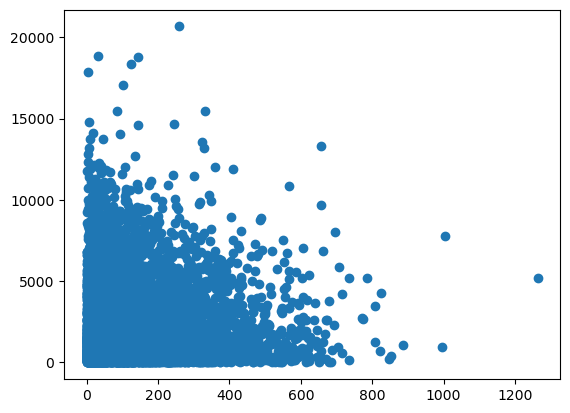

In [47]:
# Revisar la dispersión de los datos de precio y peso
plt.scatter(data['precio'], data['peso_g_producto']);

En las siguientes líneas de código vamos calcular la correlación lineal que tienen los datos mostrados anteriormente, para así darle una trascendencia más allá de lo gráficamente visto, para esto además, vamos a calcular la correlación con todas las demás variables numéricas que existan 

In [48]:
# Calcular coeficiente de pearson para todos los datos numéricos
data[['precio','valor_flete','peso_g_producto']].corr(method='pearson')

,precio,valor_flete,peso_g_producto
precio,1.000000,0.004075,0.000687
valor_flete,0.004075,1.000000,-0.007394
peso_g_producto,0.000687,-0.007394,1.000000


**Análisis:** Vemos que no existe una relación lineal entre el precio y el peso del producto, tampoco podemos ver esta relación entre el valor del flete y el peso del producto

### Correlación de Spearman

En estadística, la correlación de Spearman evalúa la relación monótona entre dos variables continuas u ordinales. En una relación monótona, las variables tienden a cambiar al mismo tiempo, pero no necesariamente a un ritmo constante. El coeficiente de correlación de Spearman se basa en los valores jerarquizados de cada variable y no en los datos sin procesar.

**Hipótesis:** Las medidas de volumen (largo, ancho, alto) están relacionadas con el peso, con esto podríamos establecer si las medidas permiten analizar una relación con el peso del producto

In [49]:
#Crear medida del volumen y área del producto
#Área del producto
data['area_cm2_producto']=data['longitud_cm_producto']*data['altura_cm_producto']
#Volumen de producto
data['volumen_cm3_producto']=data['longitud_cm_producto']*data['altura_cm_producto']*data['ancho_cm_producto']
data.head()

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,area_cm2_producto,volumen_cm3_producto
0,107500PO59A,A,PO59,VE5389,07/04/2018 18:12,271.86,30.72,52435,Mallama,Nariño,Productos ecoamigables,6,7,27,2486,17,11,14,187,2618
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21,86,1806
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29,243,7047
3,52187PA10A,A,PA10,VE3159,23/09/2017 23:27,108.38,35.39,52435,Mallama,Nariño,Electrodomésticos,10,1,6,734,46,48,22,2208,48576
4,84639PR12A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,73001,Ibague,Tolima,Frutas y verduras,23,16,35,884,45,26,18,1170,21060


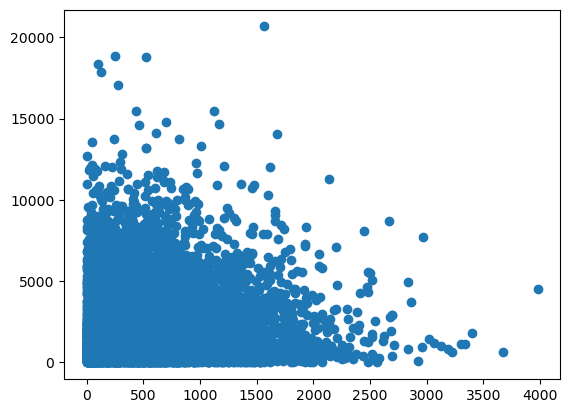

In [50]:
#graficar el área contra el peso
plt.scatter(data['area_cm2_producto'],data['peso_g_producto'])

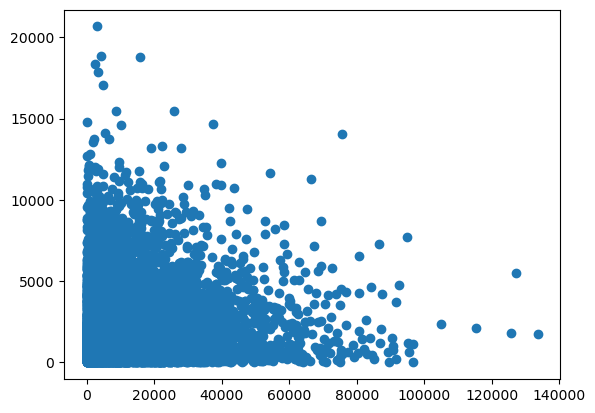

In [51]:
#graficar el volumen contra el peso
plt.scatter(data['volumen_cm3_producto'],data['peso_g_producto'])

Por último vamos a graficar las relaciones con cada uno de los componentes para el cálculo de estas medidas del producto para así analizar gráficamente las relaciones que existen, además para validar estos análisis gráficos la matriz de correlaciones de spearman

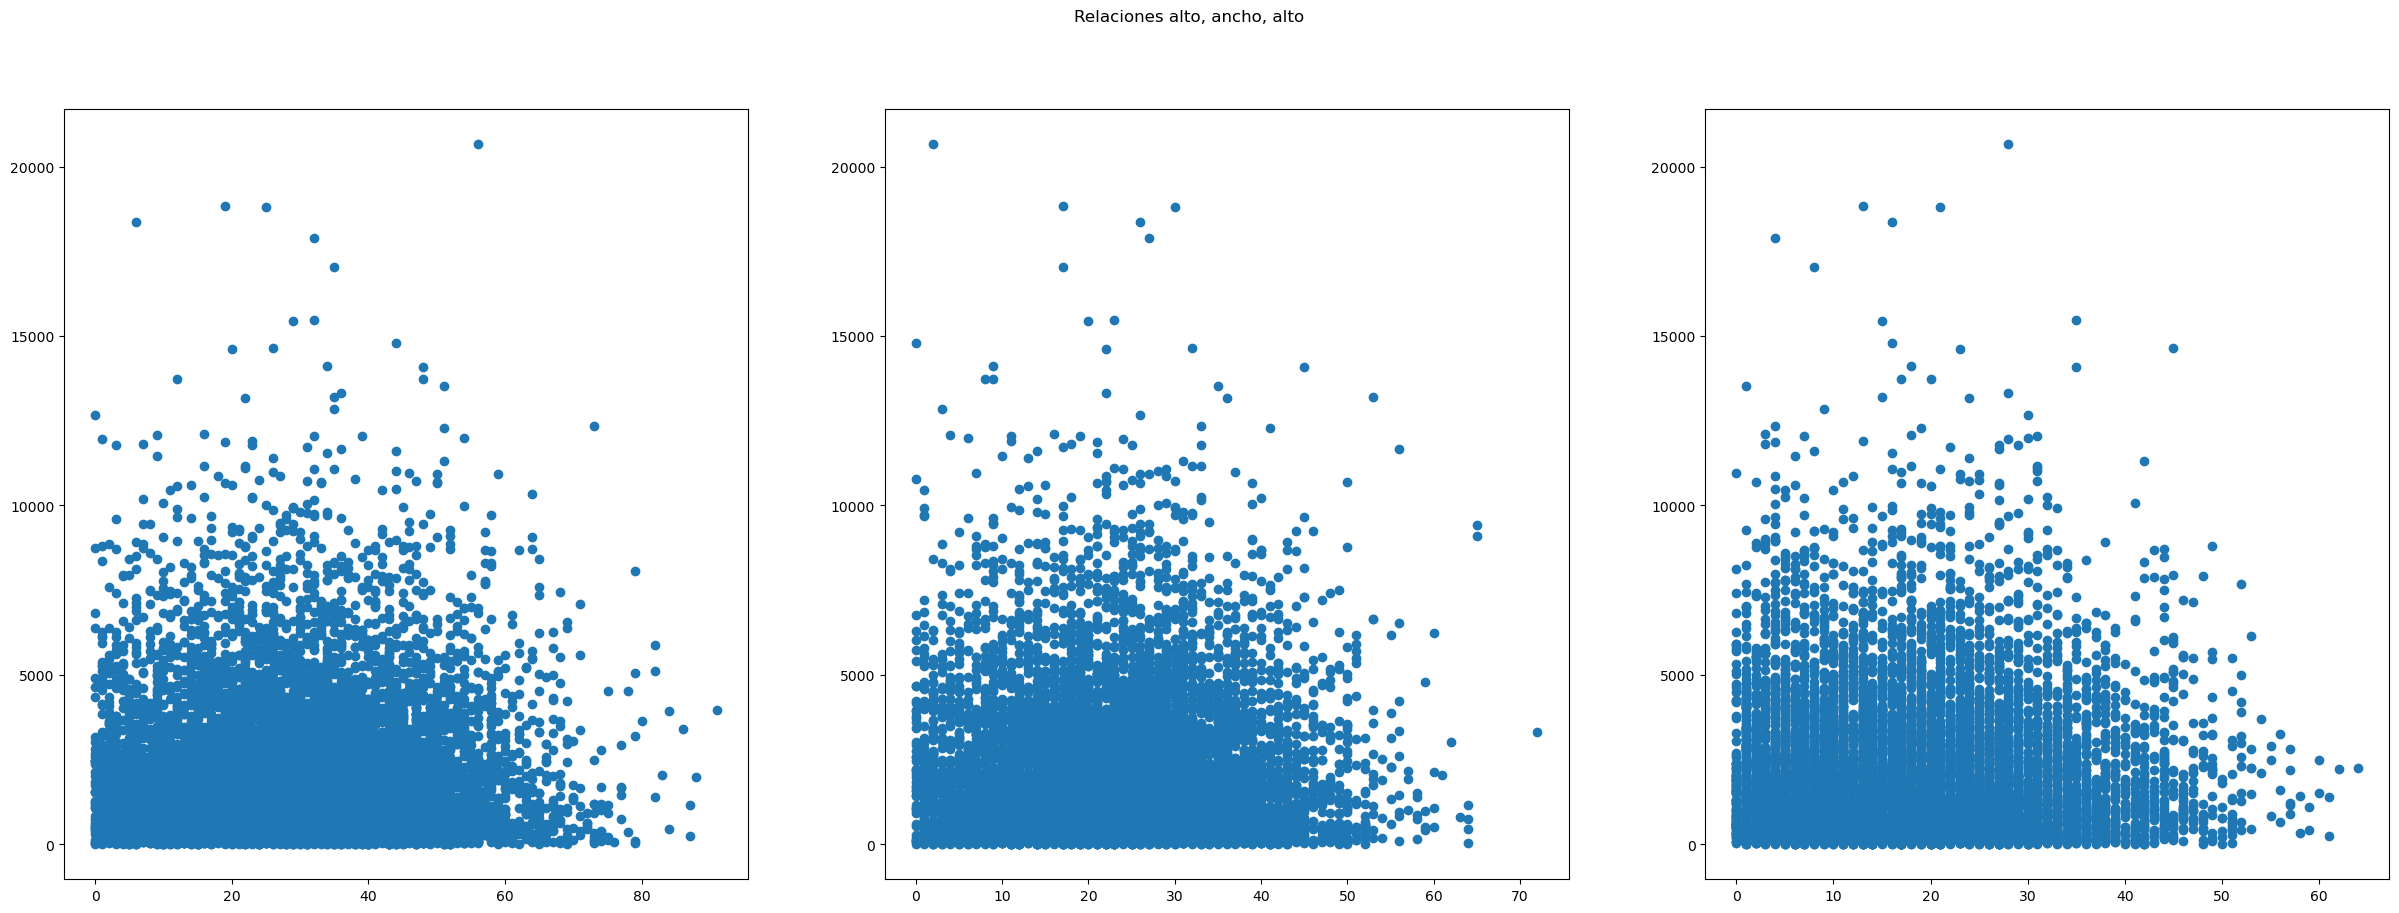

In [52]:
# graficar las demás relaciones alto, ancho, alto
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(30,10))
fig.suptitle('Relaciones alto, ancho, alto')
ax1.scatter(data['longitud_cm_producto'], data['peso_g_producto'])
ax2.scatter(data['ancho_cm_producto'], data['peso_g_producto'])
ax3.scatter(data['altura_cm_producto'], data['peso_g_producto'])

In [53]:
# matriz de correlaciones de spearman
corr=data[['longitud_cm_producto','altura_cm_producto',
      'ancho_cm_producto','peso_g_producto',
      'area_cm2_producto','volumen_cm3_producto','precio','valor_flete']].corr(method='spearman')
corr

,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,peso_g_producto,area_cm2_producto,volumen_cm3_producto,precio,valor_flete
longitud_cm_producto,1.000000,0.002816,-0.004389,0.013190,0.584639,0.484020,-0.007994,0.001056
altura_cm_producto,0.002816,1.000000,0.011629,0.015161,0.753285,0.631474,-0.003369,-0.000340
ancho_cm_producto,-0.004389,0.011629,1.000000,0.014688,0.007347,0.471033,-0.013001,0.003442
peso_g_producto,0.013190,0.015161,0.014688,1.000000,0.022410,0.022648,-0.009197,-0.003148
area_cm2_producto,0.584639,0.753285,0.007347,0.022410,1.000000,0.838702,-0.006044,0.000411
volumen_cm3_producto,0.484020,0.631474,0.471033,0.022648,0.838702,1.000000,-0.012369,0.003331
precio,-0.007994,-0.003369,-0.013001,-0.009197,-0.006044,-0.012369,1.000000,0.010807
valor_flete,0.001056,-0.000340,0.003442,-0.003148,0.000411,0.003331,0.010807,1.000000


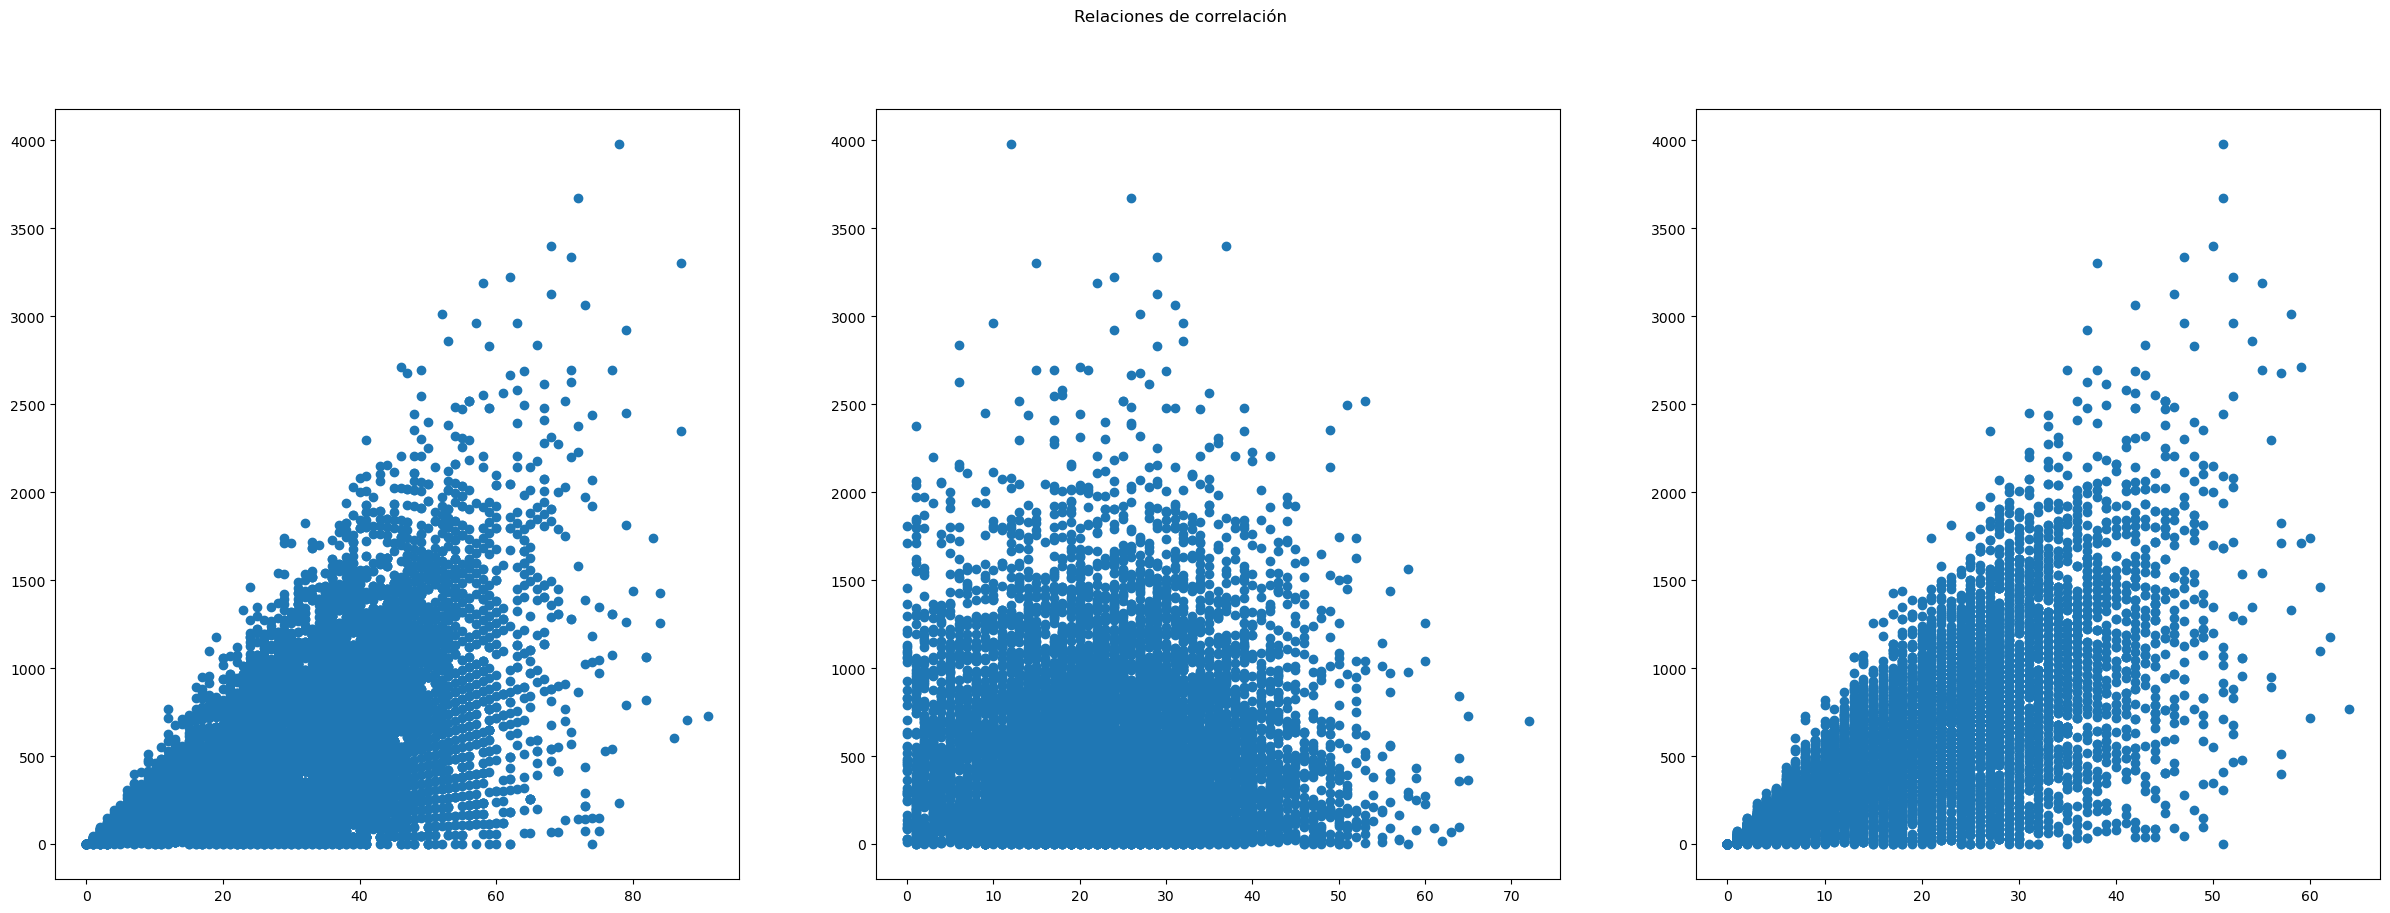

In [54]:
#Graficar las variables con correlación
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(30,10))
fig.suptitle('Relaciones de correlación')
ax1.scatter(data['longitud_cm_producto'], data['area_cm2_producto'])
ax2.scatter(data['ancho_cm_producto'], data['area_cm2_producto'])
ax3.scatter(data['altura_cm_producto'], data['area_cm2_producto'])

**Análisis:** Podemos revisar que en efecto las medidas para calcular el volúmen y el área no están correlacionadas con el peso, esta interpretación nos va a permitir eventualmente buscar descuentos con la mensajería según otras medidas, por ejemplo, en la tabla las correlaciones que existen son entre longitud y altura, podríamos establecer alguna manera de tarificar el envío a través de estas medidas

In [55]:
corr.style.background_gradient(cmap='coolwarm')

,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,peso_g_producto,area_cm2_producto,volumen_cm3_producto,precio,valor_flete
longitud_cm_producto,1.000000,0.002816,-0.004389,0.013190,0.584639,0.484020,-0.007994,0.001056
altura_cm_producto,0.002816,1.000000,0.011629,0.015161,0.753285,0.631474,-0.003369,-0.000340
ancho_cm_producto,-0.004389,0.011629,1.000000,0.014688,0.007347,0.471033,-0.013001,0.003442
peso_g_producto,0.013190,0.015161,0.014688,1.000000,0.022410,0.022648,-0.009197,-0.003148
area_cm2_producto,0.584639,0.753285,0.007347,0.022410,1.000000,0.838702,-0.006044,0.000411
volumen_cm3_producto,0.484020,0.631474,0.471033,0.022648,0.838702,1.000000,-0.012369,0.003331
precio,-0.007994,-0.003369,-0.013001,-0.009197,-0.006044,-0.012369,1.000000,0.010807
valor_flete,0.001056,-0.000340,0.003442,-0.003148,0.000411,0.003331,0.010807,1.000000


# 5. Analisis de Varianza - ANOVA
### Contexto del caso
La compañía está muy interesada en lanzar campañas promocionales por lugar de residencia de los potenciales compradores, para esto ha dispuesto una categoría de prueba, esta categoría de productos será elegida por aquella que tenga mayor cantidad de compras, para realizar un estudio de la diferencia de precios en los 5 departamentos donde más ventas se tengan. La pregunta que se plantea la compañía es ¿cómo vamos a comporar varias medias de población? Para esto vamos a realizar un análisis de varianza (ANOVA) de los precios entre los departamentos top 


In [56]:
#Calcular p valor de la F
import scipy.stats as stats

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10134 entries, 0 to 10133
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   orden_id                       10134 non-null  object 
 1   order_item_id                  10134 non-null  object 
 2   producto_id                    10134 non-null  object 
 3   vendedor_id                    10134 non-null  object 
 4   fecha_envio_limite             10134 non-null  object 
 5   precio                         10134 non-null  float64
 6   valor_flete                    10134 non-null  float64
 7   codigo_postal_vendedor         10134 non-null  object 
 8   ciudad_vendedor                10134 non-null  object 
 9   departamento_vendedor          10134 non-null  object 
 10  nombre_categoria_producto      10134 non-null  object 
 11  longitud_nombre_producto       10134 non-null  int64  
 12  longitud_descripcion_producto  10134 non-null 

### ANOVA

La idea básica detrás de un ANOVA de una vía es tomar muestras de cada grupo y luego calcular las medias muestrales para cada grupo. Luego, comparar la variación de las medias muestrales entre los grupos con la variación dentro de los grupos. 
Finalmente, podremos tomar una decisión basada en la estadística de prueba, si las medias de los grupos son todas iguales o no.

Teniendo claro nuestro objetivo de análisis vamos a realizar el arreglo de los datos para obtener la categoría de estudio y cómo influyen los departamentos en los precios de esta categoría

In [57]:
#buscar la categoría top de productos
categoria_top=data.groupby('nombre_categoria_producto').count().reset_index()[['nombre_categoria_producto','producto_id']].sort_values(by=['producto_id'], ascending=False)
categoria_top_lista=categoria_top.head(1)['nombre_categoria_producto']
categoria_top.head(1)

,nombre_categoria_producto,producto_id
19,Tecnología,543


In [58]:
#Encontrar los departamentos top 5
departamento_top=data.groupby('departamento_vendedor').count().reset_index()[['departamento_vendedor','producto_id']].sort_values(by=['producto_id'], ascending=False)
departamento_top_lista=departamento_top.head()['departamento_vendedor'].to_list()
departamento_top.head()

,departamento_vendedor,producto_id
21,Nariño,3648
20,Meta,1258
22,Norte de santander,473
25,Risaralda,405
7,Caldas,378


In [59]:
#filtrar por los departamentos top
data_top=data[data['nombre_categoria_producto'].isin(categoria_top_lista) & data['departamento_vendedor'].isin(departamento_top_lista)]
data_top[['precio','departamento_vendedor','nombre_categoria_producto']].head()

,precio,departamento_vendedor,nombre_categoria_producto
23,42.16,Nariño,Tecnología
30,169.49,Nariño,Tecnología
52,55.03,Norte de santander,Tecnología
77,27.17,Norte de santander,Tecnología
79,166.54,Nariño,Tecnología


### Aplicación de ANOVA
Debemos identificar la estimación de mínimos cuadrados

$SST=SSA+SSE$

* SST representa la suma de varianzas de cada dato con respecto a la varianza total
* SSA representa la suma de varianzas con respecto al factor A 
* SSE representa la suma de varianzas que no pueden ser explicadas.

La cantidad total de variabilidad proviene de dos fuentes posibles, a saber:
1. Diferencia entre los grupos  (que podemos explicar a través de SSA)
2. Diferencia dentro de los grupos (que podemos explicar a través de SSE)

La suma de los cuadrados debido al factor (SSA) y la suma de los cuadrados debido al error (SSE) se enumeran en la tabla ANOVA de una vía. La suma de SSA y SSE es igual a la suma total de cuadrados (SST).

###  Hipótesis de ANOVA
El esquema simple de la prueba ANOVA :
Prueba F para diferencias en más de dos medias

$H₀: μ₁ = μ₂ = μ₃ =… $

$H₁:$ No todos los $μᵢ$ son iguales, donde $i = 1, 2, 3,….$

Nivel de significancia = $α$

donde μ es la media muestral del factor

En las siguientes líneas vamos a calcular los requistos necesarios para el cálculo de el test ANOVA
1. Calcular los tamaños de los grupos para la n
2. Calcular la varianza de los grupos
3. Crear la tabla con la suma de las varianzas

In [60]:
# Variables de interés
data_muestra=data_top[['precio','departamento_vendedor']]
tamano_grupos = data_muestra.groupby('departamento_vendedor').count().reset_index()
tamano_grupos

,departamento_vendedor,precio
0,Caldas,21
1,Meta,63
2,Nariño,196
3,Norte de santander,27
4,Risaralda,19


<Axes: xlabel='departamento_vendedor'>

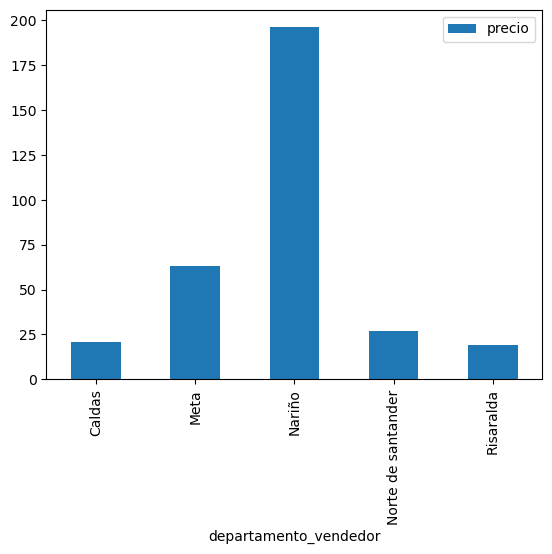

In [61]:
tamano_grupos.plot(kind='bar',x='departamento_vendedor',y='precio')

In [62]:
# varianza de los grupos
varianza_grupos = data_muestra.groupby('departamento_vendedor').std()
varianza_grupos

,precio
departamento_vendedor,
Caldas,176.368851
Meta,120.927717
Nariño,128.275393
Norte de santander,84.396308
Risaralda,160.746558


Ya con estos dos elementos podemos proceder al cálculo de la tabla, con esto podremos realizar la prueba de hipótesis y mirar si existen diferencias entre los promedios de los precios en las 5 ciudades que más se venden

In [63]:
# Crear la estructura de tabla ANOVA 
data = [['SSA', '', '', '', '', ''], ['SSE', '', '', '', '', ''], ['Total', '', '', '', '', '']] 
anova_tabla = pd.DataFrame(data, columns = ['Fuente de variación', 'SS', 'gdl', 'MS', 'F', 'P-valor']) 
anova_tabla.set_index('Fuente de variación', inplace = True)
anova_tabla

,SS,gdl,MS,F,P-valor
Fuente de variación,,,,,
SSA,,,,,
SSE,,,,,
Total,,,,,


una vez creada la tabla, podemos empezar a encontrar los valores para rellenarla, para esto vamos a calcular: 

* SST
* SSE
* SSA

y actualizarlos en la tabla

In [64]:
# Calcular la SSA y actualizamos la tabla
promedio_precio = data_muestra['precio'].mean()
SSA = data_muestra.groupby('departamento_vendedor').count() * (data_muestra.groupby('departamento_vendedor').mean() - promedio_precio)**2
anova_tabla.at['SSA', 'SS'] = SSA['precio'].sum()
anova_tabla.at['SSA', 'SS']

118419.6381464703

In [65]:
# Calculas la SSE y actualizar en la tabla
SSE = (data_muestra.groupby('departamento_vendedor').count() - 1) * data_muestra.groupby('departamento_vendedor').std()**2
anova_tabla.at['SSE', 'SS'] = SSE['precio'].sum()
anova_tabla.at['SSE', 'SS']

5387720.999827761

In [66]:
# Calcular SST y actualizar en la tabla
SST = SSA['precio'].sum() + SSE['precio'].sum()
anova_tabla.at['Total', 'SS']= SST
anova_tabla.at['Total', 'SS']

5506140.6379742315

Ya tenemos calculados nuestro $SST=SSA+SSE$

$1718564.91=37108.44 + 1681456.47$

Nuestros siguientes campos serán calcular:
* Grados de liberta (gdl)
* MS

In [67]:
# Calcular los grados de libertas
anova_tabla['gdl']['SSA'] = data_muestra['departamento_vendedor'].nunique() - 1
anova_tabla['gdl']['SSE'] = data_muestra.shape[0] - data_muestra['departamento_vendedor'].nunique()
anova_tabla['gdl']['Total'] = data_muestra.shape[0] - 1

In [68]:
anova_tabla['gdl']['SSA']

4

In [69]:
anova_tabla['gdl']['SSE']

321

In [70]:
anova_tabla['gdl']['Total']

325

In [71]:
# Calcular MS
anova_tabla['MS'] = anova_tabla['SS'] / anova_tabla['gdl']
anova_tabla['MS']

Fuente de variación
SSA      29604.909537
SSE       16784.17757
Total    16941.971194
Name: MS, dtype: object

Ya con los cálculos de los grados de libertad y con el MS calculado podemos estimar el valor F y el Valor p para la prueba estadística

In [72]:
# Calcular F 
F = anova_tabla['MS']['SSA'] / anova_tabla['MS']['SSE']
anova_tabla.at['SSA','F'] = F
F

1.7638582178917668

In [73]:
# Calcular p-valor
anova_tabla.at['SSA','P-valor'] = 1 - stats.f.cdf(F, anova_tabla.at['SSA','gdl'], anova_tabla.at['SSE','gdl'])
anova_tabla.at['SSA','P-valor']

0.13585222308475475

Con estos últimos cálculos podemos obtener el valor P de la F calculada, puedes también revisar la formulación que se propone en la infografía y cómo se traduce a lenguaje de programación, por último vamos a visualizar la tabla ya completa y evaluar la hipótesis de igualdad de medias

In [74]:
# Visualizar tabla ANOVA
anova_tabla

,SS,gdl,MS,F,P-valor
Fuente de variación,,,,,
SSA,118419.638146,4,29604.909537,1.763858,0.135852
SSE,5387720.999828,321,16784.17757,,
Total,5506140.637974,325,16941.971194,,


In [75]:
anova_tabla.at['SSA','P-valor']

0.13585222308475475

In [76]:
# Evaluar la hipótesis con un nivel de confianza del 95% y significancia del 5%
alpha=0.05 #Establecer la significancia
# Evaluar la hipótesis
print("Usar el P-valor para decidir sobre la hipótesis")
if anova_tabla.at['SSA','P-valor'] <= alpha:
    conclusion = "Se rechaza hipótesis nula "
else:
    conclusion = "No se rechaza hipótesis nula "
print(conclusion)
print("Valor F es:", anova_tabla['F']['SSA'], " y el P-valor es:", anova_tabla['P-valor']['SSA']) 

Usar el P-valor para decidir sobre la hipótesis
No se rechaza hipótesis nula 
Valor F es: 1.7638582178917668  y el P-valor es: 0.13585222308475475


Vemos que el P-valor es menor que nuestro  α por lo tanto se puede rechazar la hipótesis nula, esto nos muestra que las medias entre departamento son diferentes,por lo tanto nos refleja diferentes precios en el análisis, lo que podemos buscar con la compañía es dónde se encuentran los precios más altos para realizar la campaña de marketing allí, además analizar cómo fomentar las mismas compras en los diferentes departamentos 